# Lab 3: CNN for Handwritted Digit Recognition


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
np.random.seed(42)
#tf.random.set_seed(42)

Downloading the MNIST dataset

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


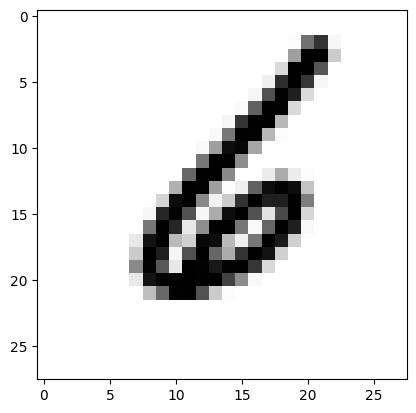

In [11]:
image_index = 999
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Preprocessing the data

In [12]:
#Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting the type to 'float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input value (input value range: {0,255})
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Defining the CNN model

In [13]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),padding='same',strides=1, input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model description

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Running the CNN model

In [15]:
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    )
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2151 - accuracy: 0.9352 - val_loss: 0.0843 - val_accuracy: 0.9751
Epoch 2/5
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0539 - val_accuracy: 0.9839
Epoch 4/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 5/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0506 - val_accuracy: 0.9853


Reference:

[1] [Keras loss functions](https://keras.io/api/losses/)

[2] [Keras optimizers](https://keras.io/api/optimizers/)

[3] [Keras metrics](https://keras.io/api/metrics/)

Evaluate the model

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0410 - accuracy: 0.9871


[0.040993642061948776, 0.9871000051498413]

conv2d
[[[-0.1631966 ]
  [ 0.0667581 ]
  [ 0.15339004]]

 [[ 0.22870402]
  [ 0.21024707]
  [-0.18688373]]

 [[-0.16355322]
  [-0.18779223]
  [-0.30736807]]]
max_pooling2d
flatten
dense
dropout
dense_1


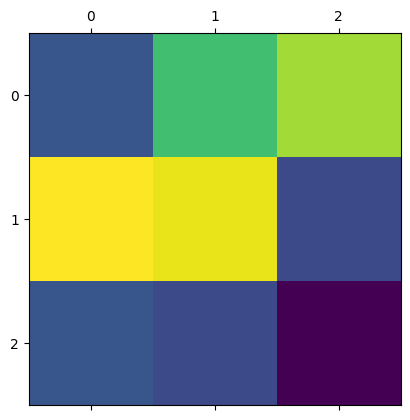

In [18]:
for layer in model.layers:
    print(layer.name)
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(3,3))
    print(filters[:,:,:,0])

In [19]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

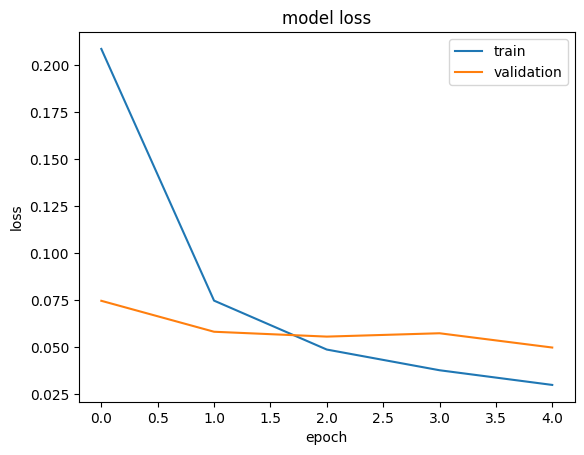

In [15]:
plotloss(history,True)

1/1 [==============================] - 0s 103ms/step
(1, 10)
0 3.370087e-16
1 1.2677387e-10
2 4.257633e-11
3 6.543864e-09
4 5.422451e-15
5 9.086792e-14
6 4.308919e-20
7 1.0
8 1.4063709e-12
9 1.8055261e-09
--------------
7
7


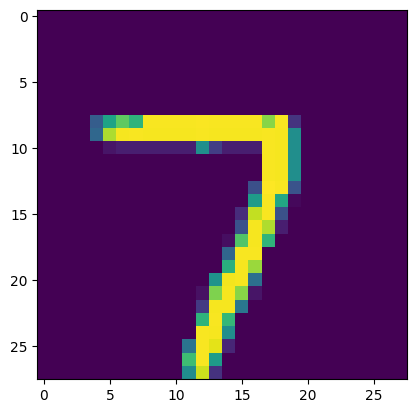

In [20]:
image_index = 3400
plt.imshow(x_test[image_index].reshape(28, 28))#,cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

## Lab
### Task #1
- Implement LeNet on this task (the final layer should be softmax)
- Plot the loss after each epoch
- Display the kernel/filters of the $1^{st}$ conv layer
- Show the performance
<img src='lenet.png'>

#### Resources
- https://keras.io/
- https://www.tensorflow.org/

Start your code here:
    

Epoch 1/7
1875/1875 [==============================] - 36s 18ms/step - loss: 0.6045 - accuracy: 0.8025 - val_loss: 0.2398 - val_accuracy: 0.9241
Epoch 2/7
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2059 - accuracy: 0.9356 - val_loss: 0.1567 - val_accuracy: 0.9538
Epoch 3/7
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1401 - accuracy: 0.9564 - val_loss: 0.1070 - val_accuracy: 0.9661
Epoch 4/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1093 - accuracy: 0.9658 - val_loss: 0.0903 - val_accuracy: 0.9691
Epoch 5/7
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0928 - accuracy: 0.9710 - val_loss: 0.0818 - val_accuracy: 0.9734
Epoch 6/7
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0799 - accuracy: 0.9743 - val_loss: 0.0668 - val_accuracy: 0.9775
Epoch 7/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0702 - accuracy: 0.9775 - val_loss: 0.0601 - val_ac

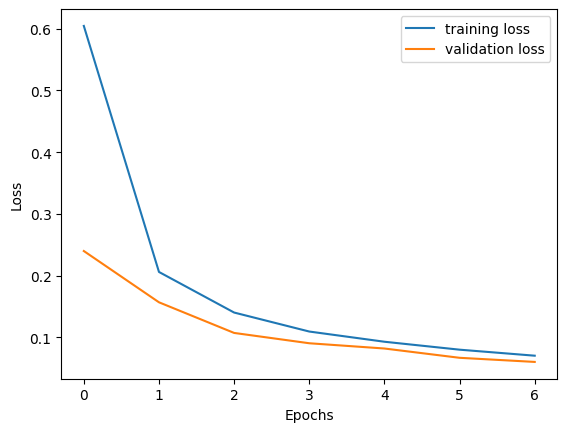

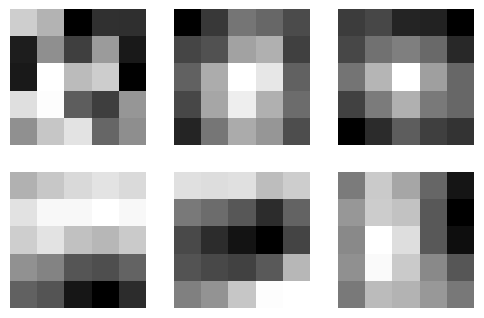

313/313 - 2s - loss: 0.0601 - accuracy: 0.9806 - 2s/epoch - 5ms/step
Test accuracy: 0.9805999994277954


In [21]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#preprocess data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for LeNet
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define LeNet model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

# Plot the loss after each epoch
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display the kernel/filters of the 1st conv layer
weights, _ = model.layers[0].get_weights()
plt.figure(figsize=(6, 6))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Show the performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

### Task #2
- Classify images into several categories
- Complete a model to classify each image into the 10 classes described below
- Compile and train the model
- Print the summary of the model
- Evaluate the model
    - Show the model loss and accuracy
    - Plot the train and validation loss
    - For 4 samples from the test set
        - Display the image
        - Print the true label in text
        - Print the output probabilities of all the classes
        - Print the predicted label in text

#### Load the dataset and normalize the pixel values

In [23]:
cifar = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

#### Define the output classes

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Display sample images

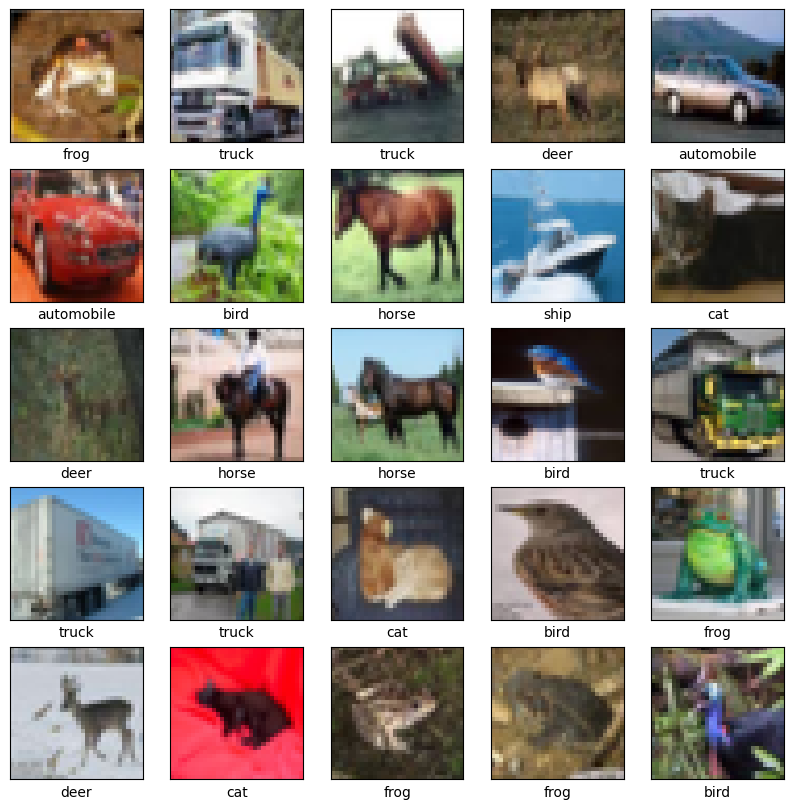

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Build the model

In [26]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train the model and achieve accuracy greater than 75%

- Use validation set

In [27]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 171s 108ms/step - loss: 1.6559 - accuracy: 0.4140 - val_loss: 1.3299 - val_accuracy: 0.5399
Epoch 2/20
1563/1563 [==============================] - 168s 107ms/step - loss: 1.2572 - accuracy: 0.5775 - val_loss: 1.1057 - val_accuracy: 0.6404
Epoch 3/20
1563/1563 [==============================] - 168s 107ms/step - loss: 1.0790 - accuracy: 0.6551 - val_loss: 1.1041 - val_accuracy: 0.6502
Epoch 4/20
1563/1563 [==============================] - 168s 107ms/step - loss: 0.9630 - accuracy: 0.6989 - val_loss: 1.0094 - val_accuracy: 0.6868
Epoch 5/20
1563/1563 [==============================] - 167s 107ms/step - loss: 0.8774 - accuracy: 0.7304 - val_loss: 0.9208 - val_accuracy: 0.7100
Epoch 6/20
1563/1563 [==============================] - 166s 106ms/step - loss: 0.8066 - accuracy: 0.7574 - val_loss: 0.9237 - val_accuracy: 0.7184
Epoch 7/20
1563/1563 [==============================] - 165s 106ms/step - loss: 0.7514 - accuracy: 0.7770 - val_

#### Print the model summary

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

#### Evaluate the model

- plot training and validation loss
- print accuracy

313/313 - 13s - loss: 0.9960 - accuracy: 0.7137 - 13s/epoch - 41ms/step
Test accuracy: 0.713699996471405


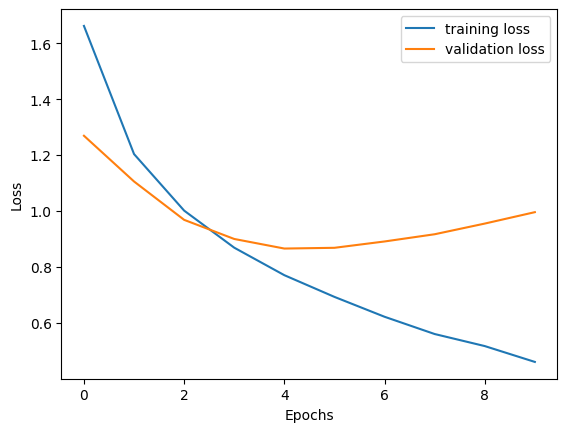

In [31]:
# print accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the train and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Taking 4 samples from the test set
- display the image
- print the true label
- print the output probability distribution of the classes
- print the predicted class

1/1 [==============================] - 0s 118ms/step


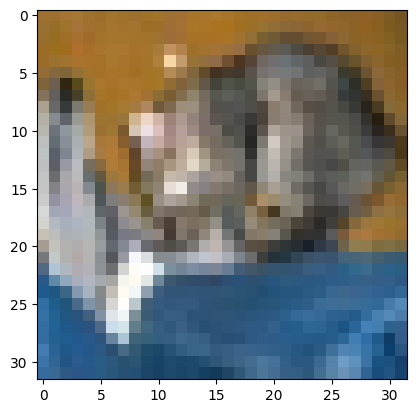

True label: cat
Output Probability Distribution: [[7.7959866e-04 5.8916205e-04 1.7428142e-04 1.5580097e-01 1.8376215e-04
  8.4091139e-01 4.5750197e-04 1.7493901e-04 3.6177234e-04 5.6655571e-04]]
Predicted class: dog
1/1 [==============================] - 0s 48ms/step


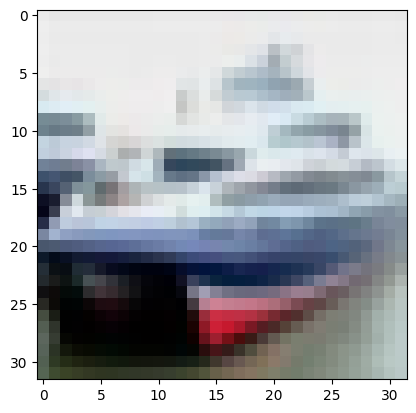

True label: ship
Output Probability Distribution: [[4.9859464e-05 6.0058832e-01 2.8274499e-08 1.2978844e-06 1.8940747e-09
  2.4466183e-06 2.1823018e-08 1.6150366e-10 3.9922699e-01 1.3103175e-04]]
Predicted class: automobile
1/1 [==============================] - 0s 52ms/step


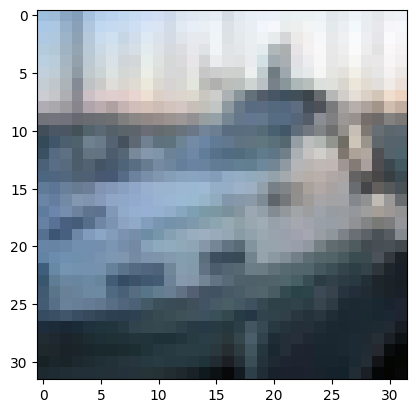

True label: ship
Output Probability Distribution: [[0.31184295 0.02726039 0.02496272 0.03406988 0.02473032 0.01177868
  0.01797025 0.00696466 0.47968787 0.0607322 ]]
Predicted class: ship
1/1 [==============================] - 0s 50ms/step


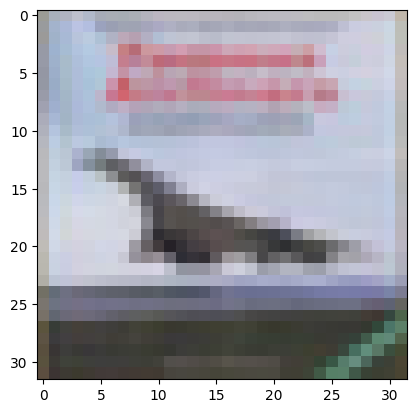

True label: airplane
Output Probability Distribution: [[9.7852325e-01 1.0841826e-04 1.9327902e-03 2.1950752e-04 8.0588285e-04
  3.3509306e-05 5.8062865e-06 9.8240589e-06 1.8101027e-02 2.5985652e-04]]
Predicted class: airplane


In [32]:
for i in range(4):
    sample_image = X_test[i]
    true_label = int(y_test[i])
    output_prob = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_class = np.argmax(output_prob)

    # Display the image
    plt.imshow(sample_image)
    plt.show()

    # Print the true label
    print(f'True label: {class_names[true_label]}')

    # Print the output probability distribution of the classes
    print(f'Output Probability Distribution: {output_prob}')

    # Print the predicted class
    print(f'Predicted class: {class_names[predicted_class]}')